In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Cleaned_data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [3]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

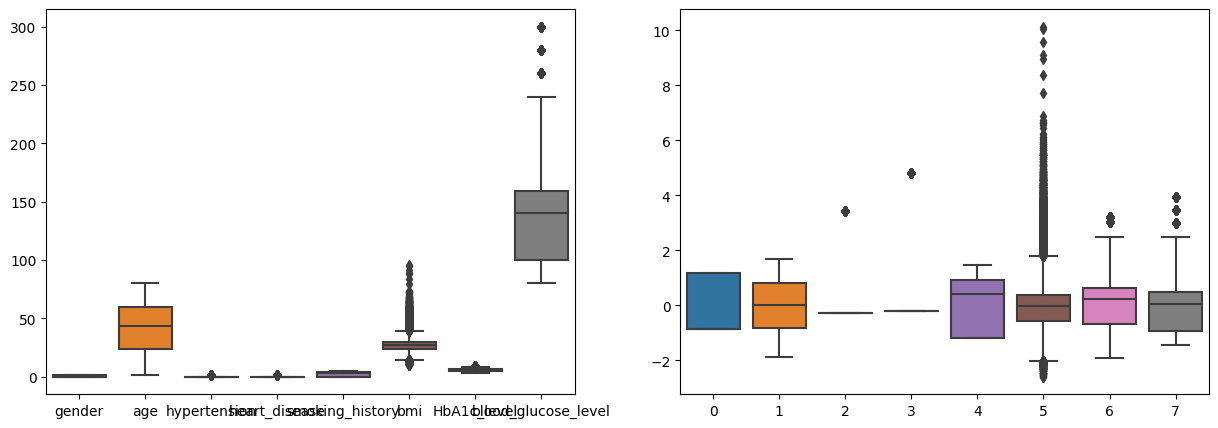

In [6]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)

In [7]:
params_logistic={
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'penalty':['l1', 'l2', 'elasticnet', None]
}
params_dtree={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features' :['auto', 'sqrt', 'log2'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'splitter':['best', 'random']
}
params_svm={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale', 'auto']
}
params_rforest={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['sqrt', 'log2', None]
}
# params_nbayes={
        
# }

In [8]:
lr=LogisticRegression()
svc=SVC()
dtree=DecisionTreeClassifier()
rforest=RandomForestClassifier()
cv_lr=GridSearchCV(lr,params_logistic,cv=5)
cv_svc=GridSearchCV(svc,params_svm,cv=5)
cv_dtree=GridSearchCV(dtree,params_dtree,cv=5)
cv_rforest=GridSearchCV(rforest,params_rforest,cv=5)

In [13]:
cv_lr.fit(x_train_scaled,y_train)
# cv_svc.fit(x_train_scaled,y_train)
cv_dtree.fit(x_train,y_train)
cv_rforest.fit(x_train,y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
185 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None]})

In [10]:
cv_lr.best_params_

{'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

In [14]:
cv_dtree.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [15]:
cv_rforest.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'max_features': None}

In [16]:
y_pred_lr=cv_lr.predict(x_test)
y_pred_dtree=cv_dtree.predict(x_test)
y_pred_rf=cv_rforest.predict(x_test)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [27]:
print("Logistic",accuracy_score(y_test,y_pred_lr)*100,"%")
print("Dtree",accuracy_score(y_test,y_pred_dtree)*100,"%")
print("R.Forest",accuracy_score(y_test,y_pred_rf)*100,'%')

Logistic 8.909892879647133 %
Dtree 97.15605965133375 %
R.Forest 97.18966603654694 %
